Features (data): (1797, 64)
Dimensions: (8, 8)
Targets: [0 1 2 ... 8 9 8]


<Figure size 640x480 with 0 Axes>

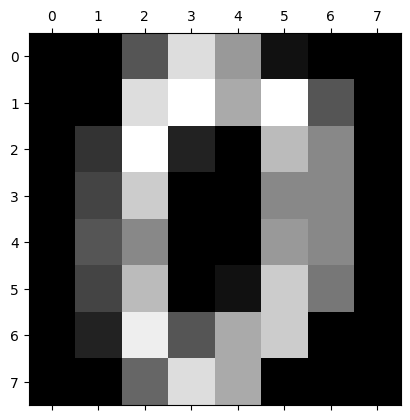

Train data shape: (1437, 64)
Test data shape: (360, 64)
Train labels shape: (1437,)
Test labels shape: (360,)


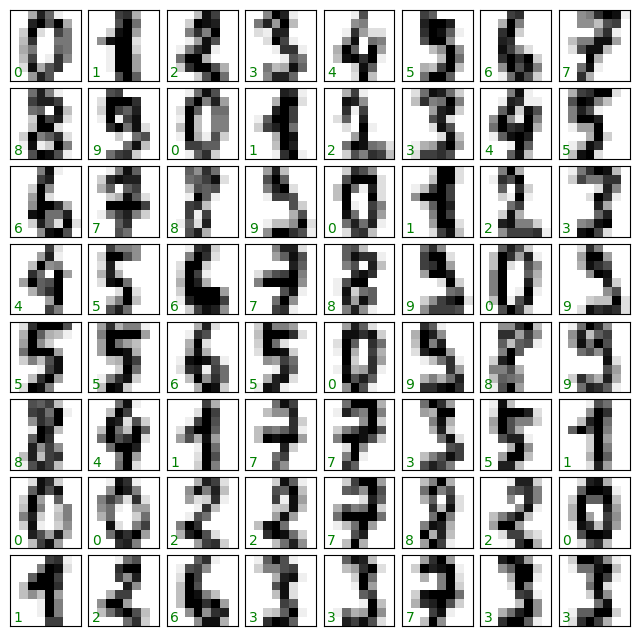

In [1]:

# Step 1: Import necessary libraries
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 2: Load the Digits dataset
digits = load_digits()

# Step 3: Display features and dimensions
print("Features (data):", digits.data.shape)
print("Dimensions:", digits.images[0].shape)

# Step 4: Display targets
print("Targets:", digits.target)

# Step 5: Convert dataset into X and y
X = digits.data
y = digits.target

# Step 6: Display one image
plt.gray()
plt.matshow(digits.images[0])
plt.show()

# Step 7: Display 64 images with labels
fig, axes = plt.subplots(8, 8, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

# Step 8: Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Train labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

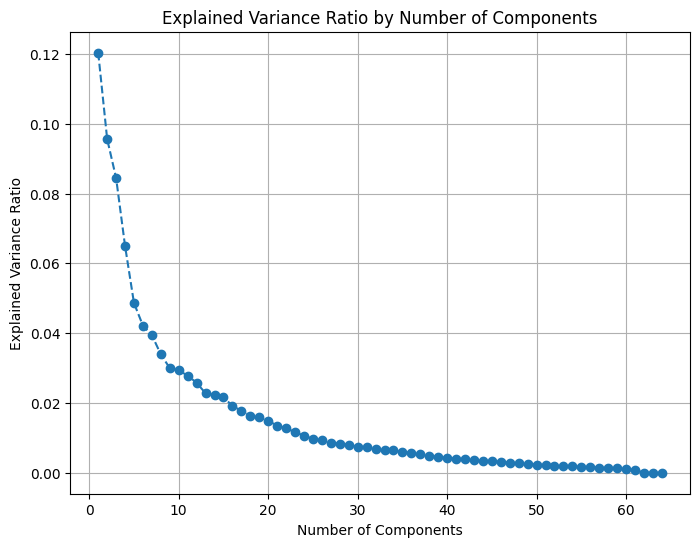

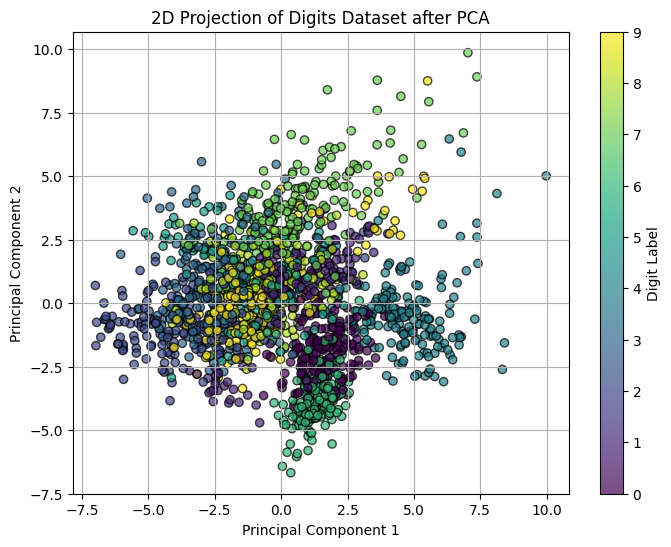

In [3]:

# Step 1: Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA to reduce the dimensionality
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualize the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

# Step 5: Choose the number of components
# Based on the explained variance ratio plot, decide how many components to keep


# Step 6: Fit PCA with the chosen number of components
n_components = 20  # Choose the number of components based on the explained variance ratio plot
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Step 7: Transform the dataset
X_reduced = pca.transform(X_scaled)

# Step 8: Optionally, visualize the reduced dataset (e.g., first two components)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Digits Dataset after PCA')
plt.colorbar(label='Digit Label')
plt.grid(True)
plt.show()

     Outlook Temperature Humidity  Windy Play
0      Sunny         hot     high  False   no
1      Sunny         hot     high   True   no
2   Overcast         hot     high  False  yes
3      Rainy        mild     high  False  yes
4      Rainy        cool   normal  False  yes
5      Rainy        cool   normal   True   no
6   Overcast        cool   normal   True  yes
7      Sunny        mild     high  False   no
8      Sunny        cool   normal  False  yes
9      Rainy        mild   normal  False  yes
10     Sunny        mild   normal   True  yes
11  Overcast        mild     high   True  yes
12  Overcast         hot   normal  False  yes
13     Rainy        mild     high   True   no
X:
     Outlook Temperature Humidity  Windy
0      Sunny         hot     high  False
1      Sunny         hot     high   True
2   Overcast         hot     high  False
3      Rainy        mild     high  False
4      Rainy        cool   normal  False
5      Rainy        cool   normal   True
6   Overcast        

<ipython-input-8-b7193c351217>:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


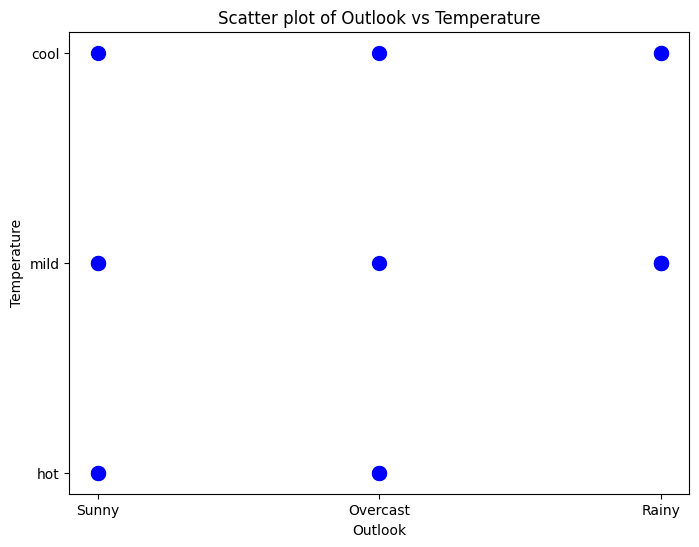

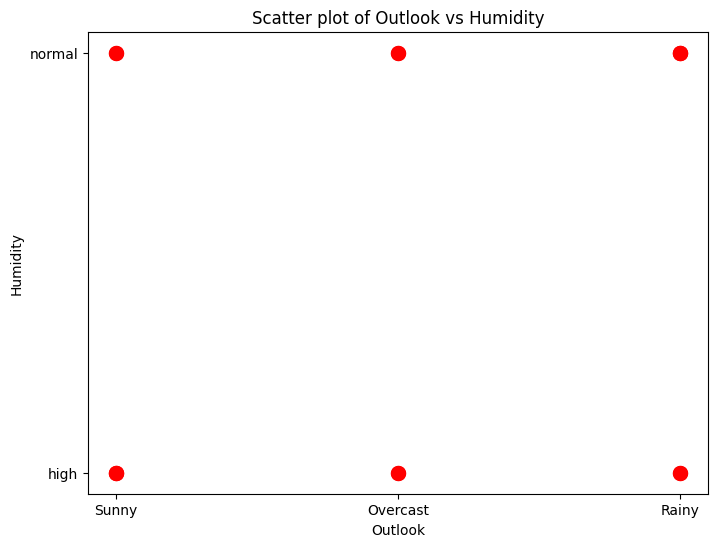

In [8]:

import pandas as pd

# Create a list of data
data = [
    ["Sunny", "hot", "high", False, "no"],
    ["Sunny", "hot", "high", True, "no"],
    ["Overcast", "hot", "high", False, "yes"],
    ["Rainy", "mild", "high", False, "yes"],
    ["Rainy", "cool", "normal", False, "yes"],
    ["Rainy", "cool", "normal", True, "no"],
    ["Overcast", "cool", "normal", True, "yes"],
    ["Sunny", "mild", "high", False, "no"],
    ["Sunny", "cool", "normal", False, "yes"],
    ["Rainy", "mild", "normal", False, "yes"],
    ["Sunny", "mild", "normal", True, "yes"],
    ["Overcast", "mild", "high", True, "yes"],
    ["Overcast", "hot", "normal", False, "yes"],
    ["Rainy", "mild", "high", True, "no"],
]
# Create column names
column_names = ["Outlook", "Temperature", "Humidity", "Windy", "Play"]

# Create the DataFrame
df = pd.DataFrame(data, columns=column_names)

# Print the DataFrame
print(df)
#Convert data into X and y
# Separate features (X) and target variable (y)
X = df[["Outlook", "Temperature", "Humidity", "Windy"]]
y = df["Play"]

# Print X and y
print("X:")
print(X)
print("y:")
print(y)
#Show descriptive statistics
print(df.describe())
#Show correlations
# Print the correlation matrix
print(df.corr())
#Show scatter matrix
# Import libraries
import matplotlib.pyplot as plt

# Create the scatter matrix
df.plot(kind="scatter", x="Outlook", y="Temperature", s=100, c="blue", figsize=(8, 6))
plt.title("Scatter plot of Outlook vs Temperature")
plt.show()

df.plot(kind="scatter", x="Outlook", y="Humidity", s=100, c="red", figsize=(8, 6))
plt.title("Scatter plot of Outlook vs Humidity")
plt.show()

In [5]:

import pandas as pd
import numpy as np

# Define the cities and their annual average temperature, humidity, and wind values
cities_data = {
    'Karachi': {'Temperature (°C)': 30, 'Humidity (%)': 60, 'Wind (km/h)': 15},
    'Lahore': {'Temperature (°C)': 25, 'Humidity (%)': 65, 'Wind (km/h)': 10},
    'Islamabad': {'Temperature (°C)': 20, 'Humidity (%)': 55, 'Wind (km/h)': 5},
    'Rawalpindi': {'Temperature (°C)': 22, 'Humidity (%)': 50, 'Wind (km/h)': 8},
    'Faisalabad': {'Temperature (°C)': 27, 'Humidity (%)': 70, 'Wind (km/h)': 12}
}

# Function to generate random values with given mean and standard deviation
def generate_random_data(mean, std_dev, size=250):
    return np.random.normal(mean, std_dev, size)

# Initialize lists to store data
city_list = []
temperature_list = []
humidity_list = []
wind_list = []

# Generate random data for each city and calculate variation
for city, data in cities_data.items():
    temperature_random = generate_random_data(data['Temperature (°C)'], 3)  # Standard deviation assumed as 3
    humidity_random = generate_random_data(data['Humidity (%)'], 3)
    wind_random = generate_random_data(data['Wind (km/h)'], 1)  # Standard deviation assumed as 1

    city_list.extend([city] * 250)
    temperature_list.extend(temperature_random)
    humidity_list.extend(humidity_random)
    wind_list.extend(wind_random)

# Calculate variation
temperature_variation = np.var(temperature_list)
humidity_variation = np.var(humidity_list)
wind_variation = np.var(wind_list)

# Create DataFrame
df = pd.DataFrame({
    'City': city_list,
    'Temperature (°C)': temperature_list,
    'Humidity (%)': humidity_list,
    'Wind (km/h)': wind_list
})

# Display variation
print("Variation in Temperature (°C):", temperature_variation)
print("Variation in Humidity (%):", humidity_variation)
print("Variation in Wind (km/h):", wind_variation)

# Display the DataFrame
print(df)


Variation in Temperature (°C): 22.210244462278688
Variation in Humidity (%): 59.262134475673165
Variation in Wind (km/h): 12.69396843342385
            City  Temperature (°C)  Humidity (%)  Wind (km/h)
0        Karachi         32.463586     57.025188    15.329917
1        Karachi         28.330367     55.292634    13.795407
2        Karachi         33.075547     62.814337    15.250513
3        Karachi         26.776617     61.268844    14.871263
4        Karachi         35.656662     57.104790    14.496120
...          ...               ...           ...          ...
1245  Faisalabad         28.631583     71.094256    10.580449
1246  Faisalabad         30.571273     71.513710    11.869425
1247  Faisalabad         24.406284     73.542048    13.205539
1248  Faisalabad         27.701375     72.709519    12.717048
1249  Faisalabad         32.143506     71.101119    10.019246

[1250 rows x 4 columns]


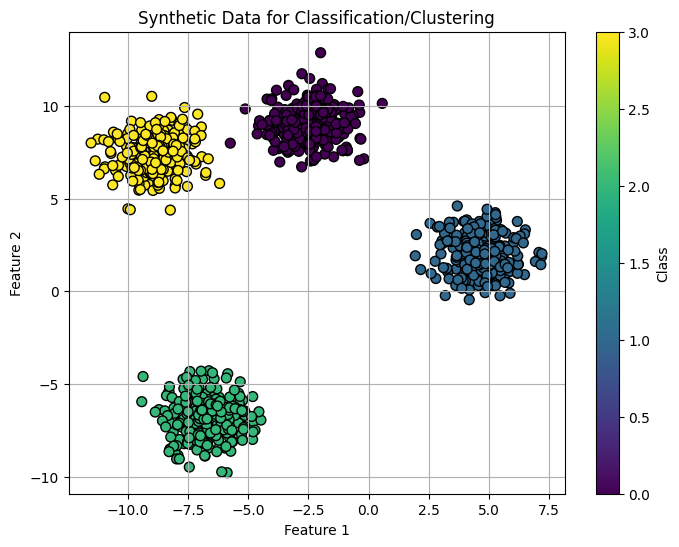

   Feature1  Feature2  Class
0 -8.555040  7.064618      3
1 -6.137532 -6.580817      2
2 -6.321300 -6.804104      2
3  4.180518  1.123325      1
4  4.380287  0.470027      1


In [7]:
# Make Blob Activities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data for classification/clustering
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)

# Step 2: Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Synthetic Data for Classification/Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

# Step 3: Combine features with labels
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = y

# Step 4: Save the data
df.to_csv('synthetic_data.csv', index=False)

# Step 5: Reload data into a DataFrame
df_reloaded = pd.read_csv('synthetic_data.csv')

# Display the first few rows of the reloaded DataFrame
print(df_reloaded.head())